Human Resources Analytics

### Exploratory Data Analysis

In [81]:
import pandas as pd
from minio import Minio
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Download dataset from Data Lake

In [83]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [84]:
df.head()

,department,salary,left,department.1,salary.1,left.1,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organize the dataset

In [85]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [86]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Handle missing values

In [87]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [88]:
df[df.isnull().any(axis=1)]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
14999,None,None,261.0,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df = df.dropna()

In [90]:
df.isnull().sum()

department                 0
salary                     0
mean_work_last_3_months    0
number_projects            0
satisfaction_level         0
last_evaluation            0
time_in_company            0
work_accident              0
left                       0
dtype: int64

#### Change Data Types

In [91]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14999 non-null  object 
 1   salary                   14999 non-null  object 
 2   mean_work_last_3_months  14999 non-null  int32  
 3   number_projects          14999 non-null  int32  
 4   satisfaction_level       14999 non-null  float64
 5   last_evaluation          14999 non-null  float64
 6   time_in_company          14999 non-null  int32  
 7   work_accident            14999 non-null  int32  
 8   left                     14999 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 878.8+ KB


In [93]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


#### Rename columns

In [96]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [97]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


##  Statistical Analysis

#### Checking the number of records

In [98]:
df.shape

(14999, 9)

#### Calculating turnover rate

In [99]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [100]:
df.describe()

,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,275.685579,3.803054,61.283352,71.610174,3.498233,0.144610,0.238083
std,10.054675,1.232592,24.863065,17.116911,1.460136,0.351719,0.425924
min,232.000000,2.000000,9.000000,36.000000,2.000000,0.000000,0.000000
25%,269.000000,3.000000,44.000000,56.000000,3.000000,0.000000,0.000000
50%,276.000000,4.000000,64.000000,72.000000,3.000000,0.000000,0.000000
75%,282.000000,5.000000,82.000000,87.000000,4.000000,0.000000,0.000000
max,321.000000,7.000000,100.000000,100.000000,10.000000,1.000000,1.000000


In [101]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident
turnover,,,,,,
0,275.669758,3.793227,64.888869,71.585054,3.401208,0.162583
1,275.736208,3.834500,49.744889,71.690563,3.808737,0.087090


Summary:

- 14,998 employee observations and 9 attributes.
- The company has a turnover of 24%.
- The average employee satisfaction is 61.
- The average satisfaction of employees who left the company is 49.

#### Correlation Matrix.

,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
averageMonthlyHours,1.000000,-0.009790,0.007669,-0.007087,0.004822,0.011991,0.002815
projectCount,-0.009790,1.000000,-0.142970,0.349333,0.196786,-0.004741,0.014262
satisfaction,0.007669,-0.142970,1.000000,0.105021,-0.100866,0.058697,-0.259428
evaluation,-0.007087,0.349333,0.105021,1.000000,0.131591,-0.007104,0.002625
yearsAtCompany,0.004822,0.196786,-0.100866,0.131591,1.000000,0.002120,0.118877
workAccident,0.011991,-0.004741,0.058697,-0.007104,0.002120,1.000000,-0.091420
turnover,0.002815,0.014262,-0.259428,0.002625,0.118877,-0.091420,1.000000


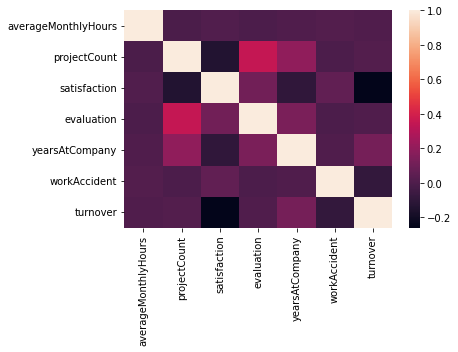

In [102]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

### Correlation Matrix & Heatmap
***
**Attributes with a moderate positive correlation:**
- projectCount vs evaluation: 0.34
     - The more projects the employees work in, the better is their evaluation
- yearsCompany vs projectCount: 0.19

**Attributes with a moderate negative correlation:**
  - satisfaction vs turnover: -0.21

**Questions:**
- What attributes affect our target variable (turnover)?
- Are there attributes with high correlation between them?
- How can we go deeper to understand the correlations?

**Summary:**

There is a **positive correlation** between the projectCount and Evaluation attributes.

It makes sense that employees who are involved in more projects work harder and are better evaluated.

There is a **negative correlation** between satisfaction and turnover attributes.

We can assume that employees who leave the company the most are less satisfied.

#### Calculating distribution of attributes

d:\projetos_python2\bootcampds\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


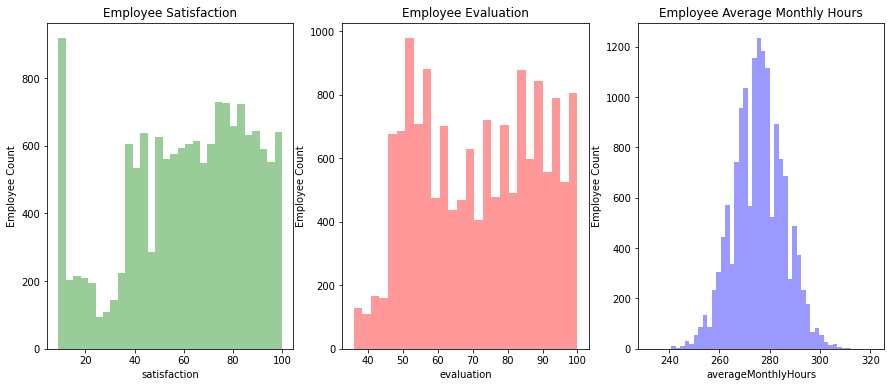

In [103]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction')
axes[0].set_ylabel('Employee Count')

sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation')
axes[1].set_ylabel('Employee Count')

sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours')
axes[2].set_ylabel('Employee Count')
plt.show()

## Distributions (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Examining the distribution of some dataset attributes:
  - **Satisfaction** - There is a peak of employees with low satisfaction but the highest concentration is in 60 to 80.
  - **Evaluation** - We have a bimodal distribution of employees with low evaluations, less than 60 and high, greater than 80.
  - **AverageMonthlyHours** - The concentration of the amount of hours worked in the last 3 months is around the average at 275 hours.
 
**Questions:**
  - Is there a reason for the spike in dissatisfied employees?

#### Checking turnover and salary.

Text(0.5, 1.0, 'Employee Salary Turnover')

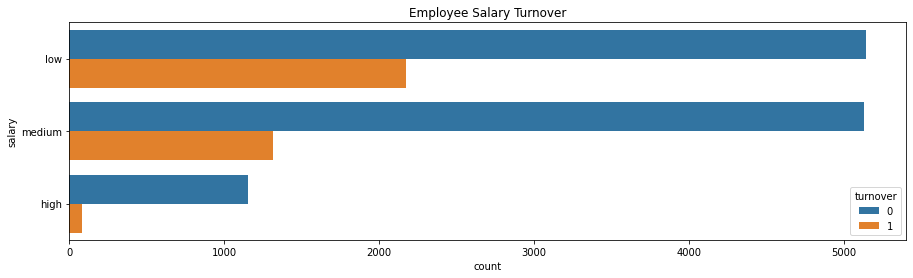

In [111]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover')

## Salary V.S. turnover
***
**Summary:**
  - Most of the employees who left had **low** or **medium** salary.
  - Almost no high-paying employees have left the company.
 
**Questions:**
  - What makes high-paid employees leave the company?

#### Checking the relation between turnover and the department

Text(0.5, 1.0, 'Turnover on Departaments')

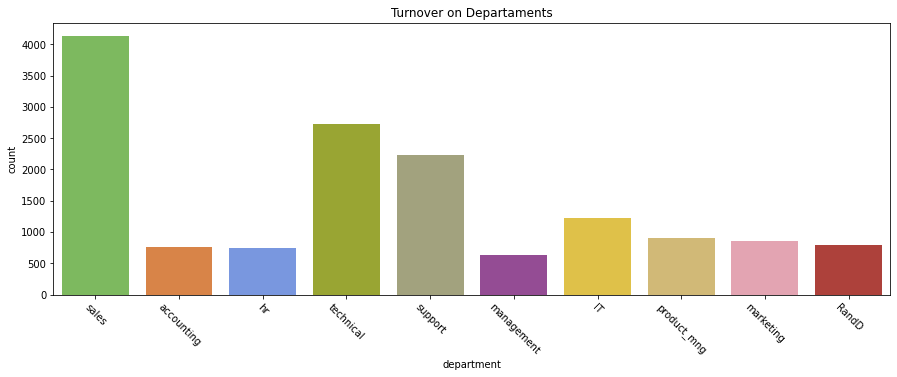

In [112]:
f, ax = plt.subplots(figsize=(15, 5))
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
plt.xticks(rotation=-45)

sns.countplot(x='department', data=df, palette=color_types).set_title('Turnover on Departaments')

Text(0.5, 1.0, 'Departament vs Turnover')

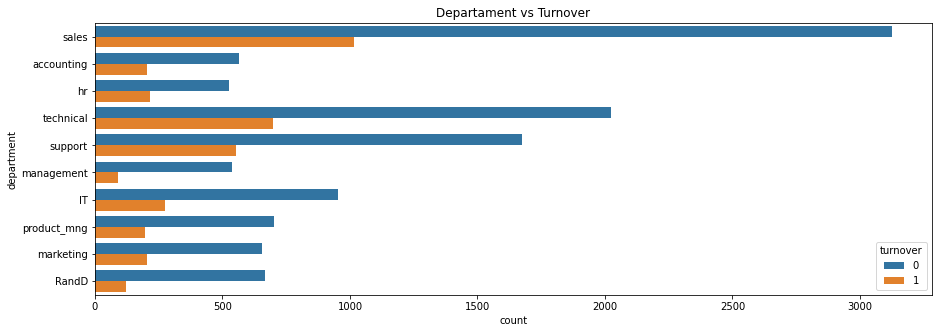

In [114]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Departament vs Turnover')

## Department V.S. turnover
***
**Summary:**
  - The sales, technical and support departments are the top 3 departments with the highest turnover rate.
  - The management department has the lowest turnover.

**Questions:**
  - What is the salary in these departments?

#### Checking the relation between turnover and the number of projects.

[]

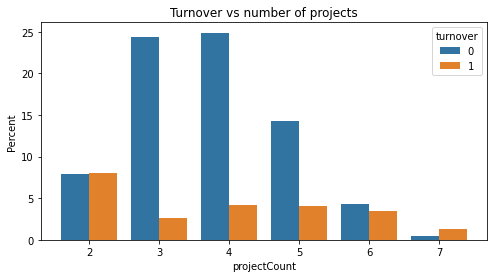

In [115]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Turnover vs number of projects')
plt.plot()

## Turnover V.S. ProjectCount
***
**Summary:**
  - More than half of employees with **2 and 7 projects** leaves the company.
  - Most of the employees who remain in the company are involved in **3 to 5 projects**.
  - Most of the employees who were with **7 projects** left the company.
 
**Questions:**
  - Does it make sense to think that employees involved in 2 or less projects are unmotivated and therefore leave the company?
  - Are employees involved in more than 6 projects feel overwhelmed and leave the company?

#### Checking the relation between turnover and the evaluation grade.

[]

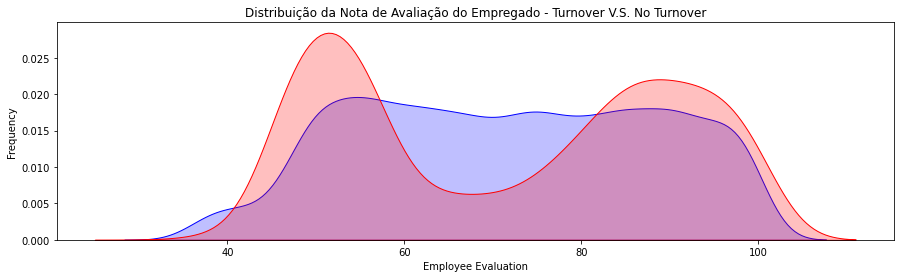

In [116]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Distribuição da Nota de Avaliação do Empregado - Turnover V.S. No Turnover')
plt.plot()

## Turnover V.S. Evaluation
***
**Summary:**
  - We have a bimodal distribution for the group that left the company.
  - Employees with **low performance** tend to leave the company.
  - Employees with **high performance** tend to leave the company.
  - The **sweet spot** for remaining employees is within the 60 to 80 rating.

#### Checking turnover against employee satisfaction.

[]

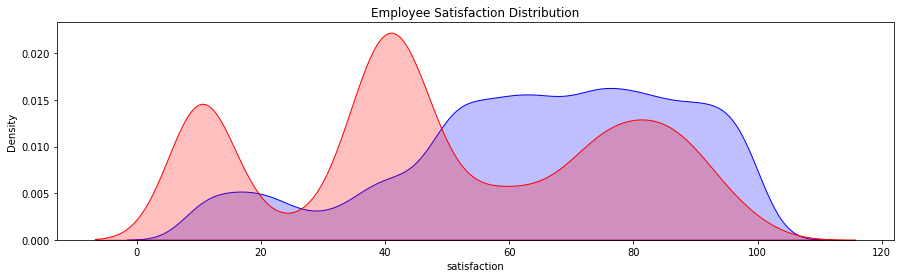

In [119]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution')
plt.plot()

## Turnover V.S. satisfaction
***
**Summary:**
  - Employees with a satisfaction level of 20 or less tend to leave the company.
  - Employees with a satisfaction level of up to 50 are more likely to leave the company.

#### Checking the relationship between the number of projects and the employee's evaluation grade

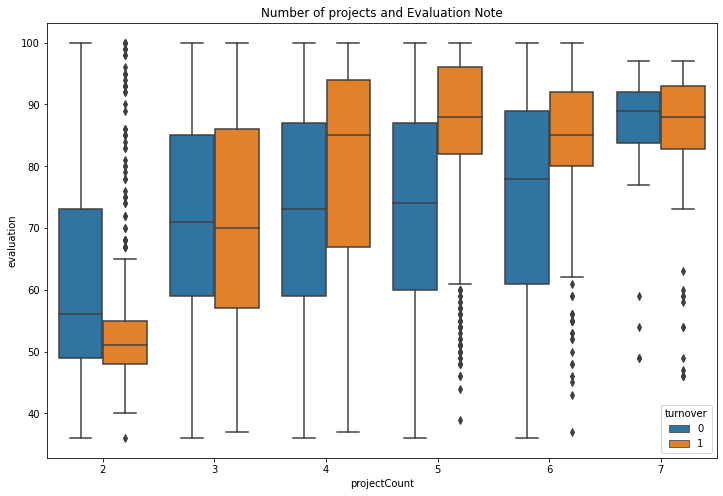

In [120]:
fig = plt.figure(figsize=(12, 8))
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)
plt.title("Number of projects and Evaluation Note")
plt.show()

## ProjectCount VS Evaluation
***
**Summary:**
- There is a **increase in evaluation** for employees who carried out more projects within the group of those who left the company.
- For the group of people who stayed with the company, employees had a **consistent evaluation score** despite the increase in project counts.
- Employees who remained in the company had an **average evaluation of around 70%**, even with the number of projects growing.
- This relationship changes dramatically among employees who have left the company. From 3 projects onwards, the **assessment averages increase considerably**.
- Employees who had **two projects and a bad rating** left.
- Employees with **more than 3 projects and high ratings** have left the company.

**Questions:**
  - Why did the employees who left have, on average, a higher evaluation than the employees who did not leave, even with an increase in the number of projects?
  - Should employees with lower ratings tend to leave the company more?

#### Checking the relationship between employee satisfaction and employee evaluation

In [121]:
from sklearn.cluster import KMeans

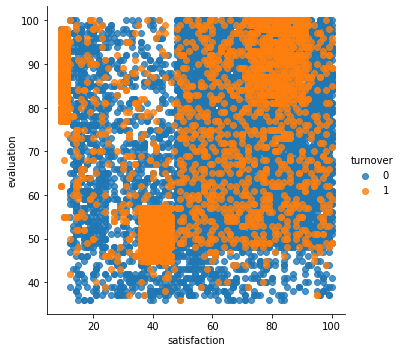

In [122]:
sns.lmplot(x = 'satisfaction', 
           y = 'evaluation', 
           data = df,
           fit_reg = False,
           hue='turnover')

Questions:
 - What could be the reason employees feel so bad when they are highly valued?
 - Could this cluster mean employees who are "overworked"?
 
**Cluster 2 (Bad and dissatisfied employees):** Satisfaction between 35 to 50 and your ratings below ~58.

Questions:
- This can be seen as employees who were poorly evaluated and felt bad at work.
- Can we call this group underperforming?

**Cluster 3 (Satisfied employees and workers):** Satisfaction between 75 and 90 and ratings above 80.
- Which could mean that the employees in this group were "ideal".
- They loved their work and were highly valued for their performance.

Questions:
- Can this group represent employees who left the company because they found another job opportunity?
- Could we have more than 3 clusters?

#### Computing the clusters

In [123]:
from sklearn.cluster import KMeans

#### Inicializando os clusters.

In [124]:
kmeans = KMeans(n_clusters=3,random_state=2)

#### Definindo o conjunto de dados.

In [125]:
df_turnover = df[df.turnover==1][["satisfaction","evaluation"]]

#### Computando os clusters.

In [126]:
kmeans.fit(df_turnover)

KMeans(n_clusters=3, random_state=2)

In [127]:
kmeans_colors = ['green' if c == 0 else 'red' if c == 1 else 'blue' for c in kmeans.labels_]

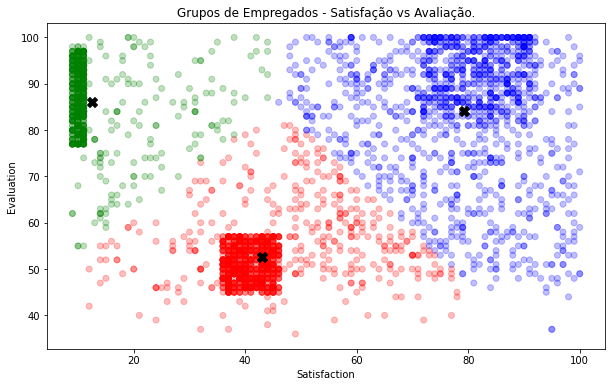

In [128]:
fig = plt.figure(figsize=(10, 6))
plt.scatter( x="satisfaction"
            ,y="evaluation"
            ,data=df_turnover,
            alpha=0.25,color = kmeans_colors)

plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

plt.scatter( x=kmeans.cluster_centers_[:,0]
            ,y=kmeans.cluster_centers_[:,1]
            ,color="black"
            ,marker="X",s=100)

plt.title("Grupos de Empregados - Satisfação vs Avaliação.")
plt.show()

## K-Means Groups
***
**Cluster 0 (Green):** Hardworking and satisfied employees.

**Cluster 1 (Red):** Bad and dissatisfied employees.

**Cluster 2 (Blue):** Hardworking and sad employees.

#### Checking the relationship between time with the company and turnover

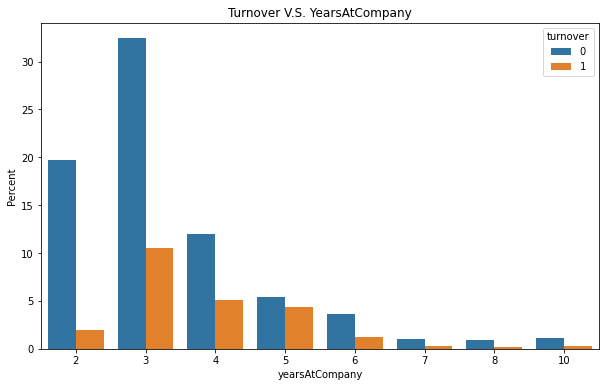

In [129]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title("Turnover V.S. YearsAtCompany")
plt.show()

## Turnover V.S. YearsAtCompany
***
**Summary:** Let's see some more points to understand why employees leave the company.
  - Employees with **4 and 5 years of service** left the company.
  - Employees over **5 years of service** must be examined.
 
**Questions:**
   - Why are Employees leaving mainly in the 3-5 year old range?
   - Who are these Employees who left?

In [130]:
import joblib

In [131]:
joblib.dump(kmeans, "cluster.joblib")

['cluster.joblib']

#### Transferring the file to the Data Lake

In [133]:
client.fput_object(
    "curated",
    "cluster.joblib",
    "cluster.joblib"
)

# Sweetviz

In [135]:
import sweetviz as sv

my_report = sv.analyze(df,"turnover")
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
